# Linear Regression Model 1

These imports are utalized in the code below. Each import has a different use and all are common in machine learning.
- Pandas: Pandas is used to make and use dataframes, as well as accessing csv files, also commonly refered to as excel files or google doc files.
- Numpy: Numpy is a collection of mathematic functions commonly imported for linear algebra, but is also used for other common math functions like square root as shown below.
- Sklearn: Sklearn is a very large import, and we are using it today to specifically split the data in to test data and training data and to compute mean_squared_error and R^2 score.
- Matplotlib: Matplotlib is used to plot graphs in python. Very useful for visualizing data.

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

From here, a linear regression model will be built and tested. Linear regression attempts to draw a line of best fit, and then uses that line to predict data correlation.

The first thing to do is to extract the data from a csv file. In this example, winequality-red.csv is used. Its a dataset of red wine with different attributes and its quality.  
You can see below after pulling data from the csv file that the colums are printed, as well as some of the data. You can also view csv files right in vscode if you install a csv  
file extension.

In [58]:
data = pd.read_csv('winequality-red.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

The data is now separated into x and y data. Our x data is everything that we will use to predict the y data. In this case, quality is the prediction we want to infer from the rest of the  
csv file, so x will have everything but quality and y will have quality. This can be seperated easily by using the drop method. Below you can see data.drop('quality', axis = 1) will return  
all columns exept quality. with that, the added .values will only return the values, or data, and this can be set equal to x.  
y is the inverse, where we want only quality's values, so data['quality'] will give us the quality column, and the added .values returns only values.

In [59]:
x = data.drop('quality', axis=1).values
y = data['quality'].values

print(x, '\n')
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]] 

[5 5 5 ... 6 5 6]


To add in the process of learning, a bias term is added. This adds a consistent term to every row of the matrix so that the variance in the dataset is diminished. With high variance, it can be hard
for the model to properly predict, and extranious data or outliers will have a greater affect on the data. The larger the bias, the more it 'flattens' the data, and makes differences mean less. Here  
is a great article by geeksforgeeks.org that talks about the bias variance balance

https://www.geeksforgeeks.org/bias-vs-variance-in-machine-learning/

In [60]:
x_bias = np.c_[np.ones((len(x), 1)), x]
print(x_bias)

[[ 1.     7.4    0.7   ...  3.51   0.56   9.4  ]
 [ 1.     7.8    0.88  ...  3.2    0.68   9.8  ]
 [ 1.     7.8    0.76  ...  3.26   0.65   9.8  ]
 ...
 [ 1.     6.3    0.51  ...  3.42   0.75  11.   ]
 [ 1.     5.9    0.645 ...  3.57   0.71  10.2  ]
 [ 1.     6.     0.31  ...  3.39   0.66  11.   ]]


The data is now separated into training and testing data. This is because we cannot use our training data to test the model, as this is the data we gave the y values for. It would be like giving you a homework assignment  
on multiplication, then using the exact same problems from the homework on the test! You would be able to perform well because of memory, and your multiplication capabilities would not be tested. Same with our model, it
would be able to perform well do to its weights being formulated for the same data, and of course it would perform well. We need to see how it performs when it gets data it has not seen before.

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_bias, y, test_size=0.2, random_state=42)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 1.    8.7   0.69 ...  3.48  0.74 11.6 ]
 [ 1.    6.1   0.21 ...  3.25  0.59 11.9 ]
 [ 1.   10.9   0.39 ...  3.3   0.75  9.8 ]
 ...
 [ 1.    7.2   0.62 ...  3.51  0.54  9.5 ]
 [ 1.    7.9   0.2  ...  3.32  0.8  11.9 ]
 [ 1.    5.8   0.29 ...  3.39  0.54 13.5 ]]
[[ 1.     7.7    0.56  ...  3.24   0.66   9.6  ]
 [ 1.     7.8    0.5   ...  3.39   0.48   9.5  ]
 [ 1.    10.7    0.67  ...  3.28   0.98   9.9  ]
 ...
 [ 1.     8.3    0.6   ...  3.15   0.53   9.8  ]
 [ 1.     8.8    0.27  ...  3.15   0.69  11.2  ]
 [ 1.     9.1    0.765 ...  3.29   0.54   9.7  ]]
[6 6 6 ... 5 7 6]
[6 5 6 5 6 5 5 5 5 6 7 3 5 5 6 7 5 7 8 5 5 6 5 6 6 6 7 6 5 6 5 5 6 5 6 5 7
 5 4 6 5 5 7 5 5 6 7 6 5 6 5 5 5 7 6 6 6 5 5 5 5 7 5 6 6 5 6 5 6 5 6 4 6 6
 6 5 8 5 6 6 5 6 5 6 6 7 5 6 7 4 7 6 5 5 5 6 5 6 5 6 5 5 5 7 6 7 6 5 6 5 8
 5 6 5 6 7 6 6 5 6 6 6 6 6 6 6 7 6 5 5 6 5 5 5 6 5 5 5 5 6 7 6 8 5 5 5 6 6
 6 5 6 7 6 5 6 5 5 6 6 6 7 5 7 5 5 5 6 6 5 5 6 5 7 6 7 6 6 5 5 6 4 6 5 7 5
 5 4 5 7 6 5 6 6 7 6 5 5 6 5 7 5 6 6 5 7 5 

This is the calculation of the 'weights' of our model. These are terms applied to the input x values to calculate the output y values. The formula is

b = (X^T . X) ^ -1 . X^T . y

where X^T is the X matrix transposed. For more infromation on how linear regression is calculated in linear algebra, look at these two articles. The first one is easier to understand,
and the second one is more indepth.

https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/  
https://xebia.com/blog/the-linear-algebra-behind-linear-regression/

In [62]:
weights = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
print(weights)

[ 1.43551052e+01  2.30853339e-02 -1.00130443e+00 -1.40821461e-01
  6.56431104e-03 -1.80650315e+00  5.62733439e-03 -3.64444893e-03
 -1.03515936e+01 -3.93687732e-01  8.41171623e-01  2.81889567e-01]


Now, the predictions are calculated using our weights and testing values. This is done with a simple dot prodcut of the test data and weights we computed. We turn this into a dataframe  
to compare it with the actual ground truth. Look at how they compare. Are they similar? Different? Close? Far?

In [63]:
predictions = x_test.dot(weights)
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(df_predictions)

     Actual  Predicted
0         6   5.346664
1         5   5.056313
2         6   5.664470
3         5   5.464515
4         6   5.725185
..      ...        ...
315       6   5.688153
316       5   5.232255
317       5   5.280535
318       6   6.272466
319       4   5.197072

[320 rows x 2 columns]


To compare Linear Regression Models, RMSE (Root Mean Squared Error) and R^2 (Coefficient of dertermination) values are commonly used. I will link wiki pages to the functions below.

https://en.wikipedia.org/wiki/Root-mean-square_deviation  
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [64]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

Finally, the output data is rounded and compared with the ground truth. Same questions as before, how close and similar is the data? RMSE and R^2 are printed with the accuracy of the model.   
Model accuracy is not a good indicator for linear regression as 5.51 could be close enough to some data points, but would be rounded to 6. Also, 5.49 could be considered to far off, even if it  
correctly rounded to 5. Thats why RMSE and R^2 are traditionally used.

In [65]:
df_predictions['Rounded_Predicted'] = df_predictions['Predicted'].round().astype(int)

accurate_predictions = (df_predictions['Actual'] == df_predictions['Rounded_Predicted']).sum()
total_predictions = len(df_predictions)
accuracy_percentage = (accurate_predictions / total_predictions) * 100

print("Rounded Predictions:")
print(df_predictions[['Actual', 'Rounded_Predicted']])

print("\nAccuracy Percentage:", accuracy_percentage, "%")
print("\nRoot Mean Squared Error:", rmse)
print("\nR-Squared:", r_squared)

Rounded Predictions:
     Actual  Rounded_Predicted
0         6                  5
1         5                  5
2         6                  6
3         5                  5
4         6                  6
..      ...                ...
315       6                  6
316       5                  5
317       5                  5
318       6                  6
319       4                  5

[320 rows x 2 columns]

Accuracy Percentage: 57.1875 %

Root Mean Squared Error: 0.6245199307049489

R-Squared: 0.4031803414574944


Finally the model is printed with its line of best fit.

Model Coefficients: [ 1.43551052e+01  2.30853339e-02 -1.00130443e+00 -1.40821461e-01
  6.56431104e-03 -1.80650315e+00  5.62733439e-03 -3.64444893e-03
 -1.03515936e+01 -3.93687732e-01  8.41171623e-01  2.81889567e-01]


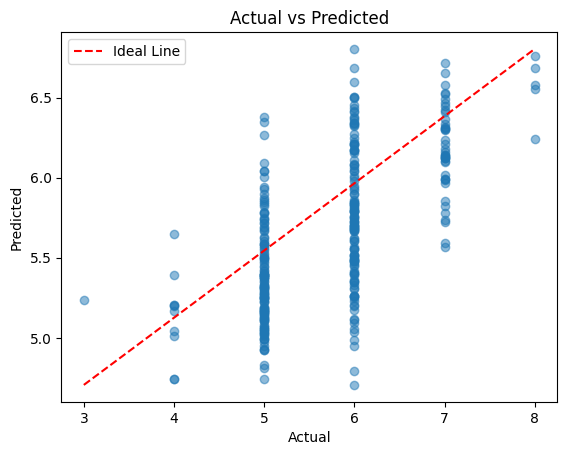

In [66]:
print("Model Coefficients:", weights)

plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(predictions), max(predictions)], linestyle='--', color='red', label='Ideal Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()